# Working with TIFFs in Python using numpy

In [1]:
from PIL import Image as PIL_Image
TIFfilepath = 'EBIC_measurement/10kv-15KX-97pA-50nAV-EBIC.TIF'
im = PIL_Image.open(TIFfilepath)

In [2]:
from IPython.display import Image

In [3]:
orignalimage_jpg = Image(filename='EBIC_measurement/10kv-15KX-97pA-50nAV-EBIC.jpg')

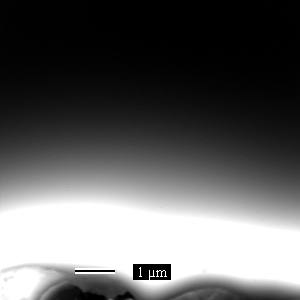

In [4]:
orignalimage_jpg

In [5]:
import numpy as np
imarray = np.array(im)

In [6]:
imarray.shape

(300, 300)

In [7]:
imarray

array([[  2,   2,   2, ...,   0,   0,   0],
       [  2,   2,   2, ...,   1,   1,   1],
       [  2,   2,   2, ...,   0,   0,   0],
       ..., 
       [255, 250, 248, ...,  77,  79,  81],
       [255, 254, 250, ...,  71,  74,  76],
       [255, 255, 252, ...,  69,  72,  73]], dtype=uint8)

In [8]:
imarray_linescan = imarray[:,50]

In [9]:
imarray_linescan.shape

(300,)

In [10]:
imarray_linescan

array([  1,   1,   1,   1,   1,   0,   1,   1,   1,   1,   1,   2,   1,
         1,   1,   0,   0,   1,   0,   2,   1,   1,   0,   2,   1,   1,
         1,   1,   1,   2,   0,   1,   1,   1,   2,   0,   1,   1,   1,
         1,   2,   1,   1,   2,   1,   2,   2,   1,   2,   2,   2,   3,
         2,   2,   2,   3,   2,   4,   2,   3,   2,   3,   4,   5,   3,
         4,   3,   3,   5,   4,   5,   5,   5,   7,   5,   5,   6,   6,
         7,   7,   7,   7,   8,   8,   9,  10,   9,  10,  11,  10,  10,
        10,  12,  12,  12,  14,  12,  15,  13,  15,  15,  16,  16,  17,
        19,  18,  19,  20,  20,  22,  22,  24,  23,  24,  25,  26,  28,
        27,  28,  29,  30,  31,  33,  33,  34,  35,  36,  38,  37,  40,
        41,  42,  43,  43,  48,  47,  49,  50,  52,  53,  54,  57,  58,
        59,  61,  61,  64,  66,  68,  70,  71,  73,  76,  76,  79,  81,
        82,  86,  88,  91,  92,  95,  98,  98, 102, 104, 106, 109, 112,
       114, 117, 118, 123, 125, 129, 131, 135, 138, 141, 145, 14

## Plot EBIC line scan

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

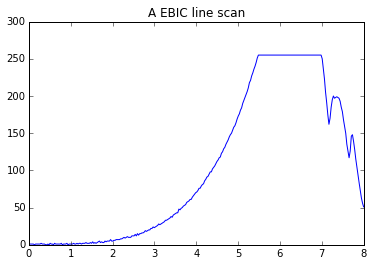

In [13]:
x = np.linspace(0, 8, 300)
plt.plot(x, imarray_linescan)
plt.title('EBIC current from TIF')
plt.xlabel('Microns')
plt.ylabel('EBIC Current')

## Read the Raw data

In [14]:
from array import  array
from sys import  byteorder as system_endian
from os import stat

def read_file(filename, endian):
    count = int(stat(filename).st_size / 2) 
    print(count)
    with open(filename, 'rb') as f:
        result  = array('h')
        result.fromfile(f, count)
        if endian != system_endian : result.byteswap()
        return result

read_file('EBIC_measurement/raw.dat','little')

90049


array('h', [300, 300, 418, 425, 429, 421, 422, 421, 416, 422, 417, 404, 426, 452, 445, 448, 427, 413, 395, 372, 385, 402, 410, 414, 407, 414, 414, 406, 400, 416, 407, 396, 400, 408, 403, 400, 400, 411, 423, 436, 442, 427, 404, 398, 376, 365, 384, 391, 390, 399, 396, 385, 397, 386, 388, 391, 392, 391, 393, 389, 388, 385, 384, 401, 415, 415, 420, 403, 389, 382, 359, 359, 365, 375, 381, 386, 378, 378, 389, 366, 380, 386, 386, 383, 380, 385, 396, 398, 406, 410, 381, 354, 341, 351, 352, 365, 369, 376, 368, 364, 363, 369, 378, 360, 363, 368, 359, 356, 362, 362, 348, 365, 375, 393, 398, 367, 349, 342, 326, 330, 337, 343, 357, 355, 338, 345, 351, 340, 334, 347, 349, 337, 336, 347, 335, 335, 343, 349, 352, 357, 363, 354, 334, 309, 304, 311, 317, 320, 319, 329, 326, 322, 328, 325, 330, 323, 327, 333, 333, 328, 314, 326, 333, 352, 351, 362, 360, 336, 313, 301, 301, 309, 309, 322, 330, 328, 311, 333, 334, 324, 319, 337, 329, 321, 336, 332, 336, 325, 329, 353, 351, 365, 358, 337, 312, 301, 305, 318

## Load raw array into np array as a 300*300 matrix

In [15]:
result = read_file('EBIC_measurement/raw.dat','little')

outputarray_300_300 = np.zeros((1,300))
for rowindex in range(0,300):
    arraytobeappended = np.array([])
    for colindex in range(0,300):
        arraytobeappended =  np.append(arraytobeappended,result[rowindex*300+colindex])
    outputarray_300_300 = np.append(outputarray_300_300,[arraytobeappended],axis=0)

90049


In [16]:
outputarray_300_300

array([[    0.,     0.,     0., ...,     0.,     0.,     0.],
       [  300.,   300.,   418., ...,   350.,   358.,   358.],
       [  364.,   369.,   423., ...,   402.,   401.,   410.],
       ..., 
       [ 2944.,  2988.,  8532., ...,  2520.,  2581.,  2640.],
       [ 2693.,  2748.,  8580., ...,  2326.,  2376.,  2465.],
       [ 2543.,  2614.,  8721., ...,  2263.,  2349.,  2392.]])

In [17]:
rawimarray_linescan = outputarray_300_300[:,50]

In [18]:
rawimarray_linescan = np.delete(rawimarray_linescan,0)
print(rawimarray_linescan)

array([     0.,    396.,    396.,    390.,    382.,    389.,    399.,
          387.,    377.,    377.,    389.,    388.,    394.,    390.,
          387.,    364.,    358.,    392.,    432.,    386.,    383.,
          391.,    427.,    350.,    412.,    382.,    397.,    392.,
          395.,    400.,    423.,    359.,    403.,    376.,    420.,
          390.,    410.,    381.,    405.,    399.,    400.,    401.,
          402.,    393.,    406.,    419.,    409.,    415.,    403.,
          425.,    453.,    427.,    421.,    404.,    421.,    433.,
          432.,    451.,    472.,    457.,    441.,    490.,    458.,
          494.,    466.,    512.,    471.,    519.,    502.,    480.,
          489.,    511.,    515.,    518.,    539.,    547.,    510.,
          507.,    567.,    560.,    573.,    615.,    561.,    594.,
          604.,    611.,    631.,    627.,    652.,    681.,    676.,
          672.,    701.,    708.,    719.,    729.,    760.,    766.,
          791.,    7

ValueError: x and y must have same first dimension

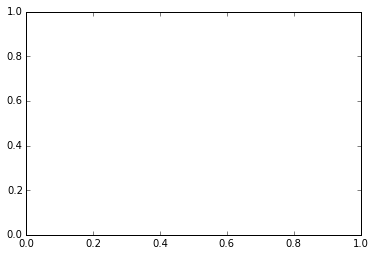

In [19]:
x = np.linspace(0, 8, 300)
plt.plot(x, rawimarray_linescan*50*10E-9)
plt.title('EBIC current from 16 bit raw data')
plt.xlabel('Microns')
plt.ylabel('EBIC Current(A)')